In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import relu_backward,sigmoid_backward,relu,sigmoid
# from utils import*

In [3]:
file = pd.read_csv("Train_data.csv")
Y=np.array(file.iloc[:,0]).reshape(97,1)
data=file.iloc[:,1:14]
# print(data)
# print(Y)

In [4]:
def initialize_parameters(linear_dims):
    x=1
    total={}
    while x<len(linear_dims):
        weight=np.random.randn(linear_dims[x],linear_dims[x-1])
        total.update({"W"+str(x) : weight})
        bais=np.zeros((linear_dims[x],1))
        total.update({("b"+str(x)) : bais})
        x=x+1
    return total   

In [5]:
# A is input
def linear_forward(A,W,b):
        A=np.array(A).T
        z=W.dot(A)+b
        cache=(A,W,b)
        return z,cache

In [6]:
def activation_forward(A_prev, W, b, activation): 
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".  
    Z, linear_cache = linear_forward(A_prev,W,b)
    if activation == "sigmoid":    
        A, act_cache = sigmoid(Z)      
    elif activation == "relu": 
        A, act_cache = relu(Z)
    else:
        A=print("not defined")    
    cache = (linear_cache, act_cache)
    return A, cache

In [7]:
def model_forward(x, parameters):
    cache=[]
    i=2
    AL,c=activation_forward(x,parameters["W1"],parameters["b1"],'relu')
    cache.append(c)
    while i<len(parameters)/2:
        AL,c=activation_forward(AL.T,parameters["W"+str(i)],parameters["b"+str(i)],'sigmoid')
        cache.append(c)
        i=i+1    
    AL,c=activation_forward(AL.T,parameters["W"+str(i)],parameters["b"+str(i)],'sigmoid')
    cache.append(c)
    return AL,cache

In [8]:
def compute_cost(AL, Y):
    # number of samples
    m = len(Y)
    
    j = (-1/m) * np.sum ( (   Y*np.log(AL.T)   +  (1-Y)*np.log(1-AL.T) ) )
    return j

In [9]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ, A_prev.T)
    db = 1./m * np.sum(dZ)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [10]:
def activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    else:
        print("not defined")     
    
    return dA_prev, dW, db

In [11]:
def model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, "sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [12]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [13]:
def train (data,labels,linear_dims,iterations,alpha,normalization='non'):
    if normalization=='scaling':
        number=int(input('enter number to divide data by it'))
        data=data/number
    elif normalization=='minmax':
        min=data.min()
        max=data.max()
        new_max=float(input('enter the maximum number'))
        new_min=float(input('enter the minimum number'))
        data=(((data-min)/(max-min))*((new_max-new_min)-(new_min)))
       # print (data)
    elif normalization=='zscore':
        data=(data-data.mean())/(data.std())
       # print (data)
    elif normalization=='non':
        pass
    else :
        print('not defined')   
    parameters=initialize_parameters(linear_dims)
    cost_history=[]

    for i in range(1,iterations):
        AL, cache = model_forward(data, parameters)
        cost=compute_cost(AL, labels)
        cost_history.append(cost)
        grads=model_backward(AL,labels,cache)
        parameters=update_parameters(parameters,grads,alpha)
    return parameters,AL,cost_history
    

In [14]:
# Y = np.random.rand(2, 1)
# Y = np.array([[.1,.1]]).reshape(2, 1)
# parameters={
#             'W1':np.array([[2,1,2],[3,2,1]]).reshape(2,3),
#             'b1':np.array([[0],[0]]).reshape(2,1)        ,
#             'W2':np.array([[1,3],[2,1]]).reshape(2,2)    ,
#             'b2':np.array([[0],[0]]).reshape(2,1)        ,
#             'W3':np.array([[2,3]]).reshape(1,2)          ,
#             'b3':np.array([[0]])
#             }
# data=np.array([[1,2,3],[2,1,2]])
# min=data.min()
# max=data.max()
# data=(data-min)/(max-min)
# data=data/100
# AL, cache = model_forward(data, parameters)



linear_dims=[13,5,5,1]
parameters,AL,cost_history=train (data,Y,linear_dims,100,0.1,'non')

C:\Users\AL-alamia\utils.py:4: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
C:\Users\AL-alamia\utils.py:23: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))


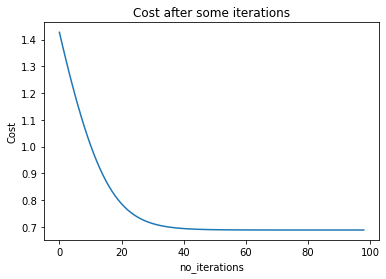

In [15]:
#x=np.arange(1,1000,1)
y=cost_history
plt.plot(y)  
plt.xlabel("no_iterations")
plt.ylabel("Cost")
plt.title("Cost after some iterations")
plt.show()